# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

     Sales Person    Country              Product        Date      Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04/01/2022   $5,320.00   
1     Van Tuxwell      India        85% Dark Bars  01/08/2022   $7,896.00   
2    Gigi Bohling      India  Peanut Butter Cubes  07/07/2022   $4,501.00   
3    Jan Morforth  Australia  Peanut Butter Cubes  27/04/2022  $12,726.00   
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24/02/2022  $13,685.00   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipp

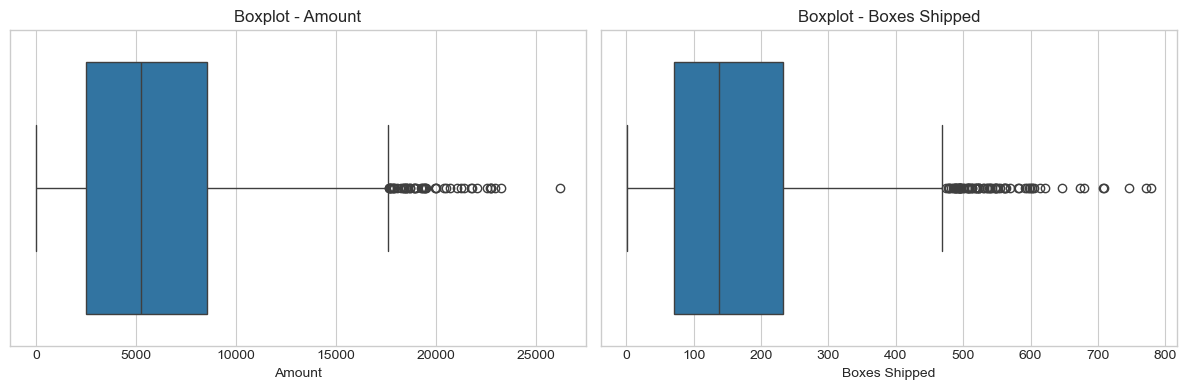

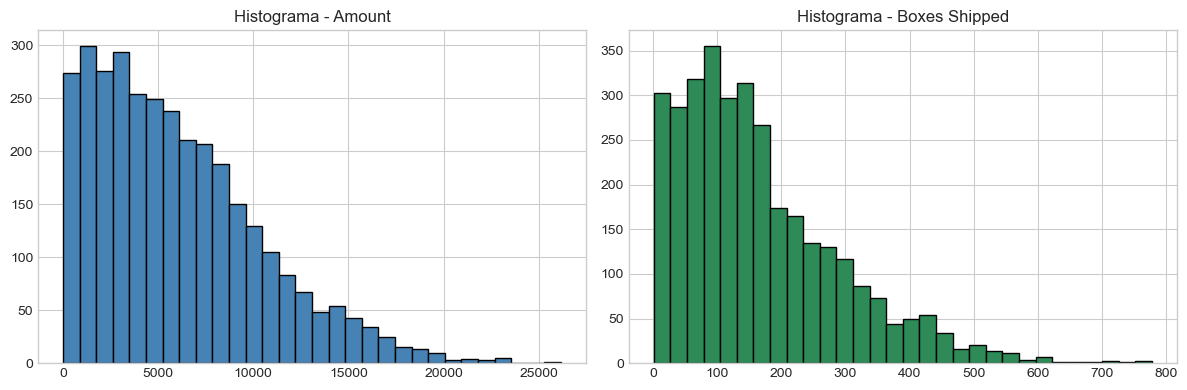


Impacto potencial de outliers:
Los outliers pueden influir en la media y en modelos sensibles a valores extremos (como regresión lineal).

Conclusión:
Revisa nulos, outliers y sesgos. Si hay diferencias grandes de escala o sesgo, conviene transformar o escalar.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Cargar datos
dt = pd.read_csv('chocolate_sales.csv')

# 2. Vista general
print(dt.head())
print(dt.info())
print(dt.dtypes)

# Limpieza mínima para análisis numérico
if dt['Amount'].dtype == 'object':
    dt['Amount'] = (
        dt['Amount']
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

if dt['Date'].dtype == 'object':
    dt['Date'] = pd.to_datetime(dt['Date'], format='%m/%d/%Y', errors='coerce')

print("\nTipos de datos tras limpieza:")
print(dt.dtypes)

# 3. Clasificación de variables
variables = {
    'Nominales': ['Sales Person', 'Country', 'Product'],
    'Ordinales': ['Date'],
    'Discretas': ['Boxes Shipped'],
    'Continuas': ['Amount']
}
print("\nClasificación de variables:")
for tipo, cols in variables.items():
    print(f"- {tipo}: {cols}")

# 4. Valores nulos
null_counts = dt.isna().sum()
null_percent = (null_counts / len(dt)) * 100
null_summary = pd.DataFrame({'nulos': null_counts, 'porcentaje': null_percent}).sort_values('nulos', ascending=False)
print("\nValores nulos por variable:")
print(null_summary)

# 5. Estadísticos descriptivos
print("\nEstadísticos descriptivos (numéricos):")
print(dt[['Amount', 'Boxes Shipped']].describe())

mean_amount = dt['Amount'].mean()
median_amount = dt['Amount'].median()
mean_boxes = dt['Boxes Shipped'].mean()
median_boxes = dt['Boxes Shipped'].median()

print("\nComparación media vs mediana:")
print(f"Amount -> media: {mean_amount:.2f}, mediana: {median_amount:.2f}")
print(f"Boxes Shipped -> media: {mean_boxes:.2f}, mediana: {median_boxes:.2f}")
print("Si la media > mediana, hay sesgo a la derecha; si media < mediana, sesgo a la izquierda.")

# 6. Asimetría y curtosis
amount_skew = dt['Amount'].skew()
amount_kurt = dt['Amount'].kurtosis()
print("\nAsimetría y curtosis:")
print(f"Amount -> skewness: {amount_skew:.3f}, kurtosis: {amount_kurt:.3f}")

# 7. Comparación entre variables numéricas (rango y escala)
num_ranges = dt[['Amount', 'Boxes Shipped']].agg(['min', 'max', 'mean', 'std'])
print("\nRangos y escalas:")
print(num_ranges)
print("Si los rangos son muy distintos, puede ser necesario escalar para modelos sensibles a magnitudes.")

# 8. Comparación por categorías
print("\nPromedios por país:")
print(dt.groupby('Country')[['Amount', 'Boxes Shipped']].mean().sort_values('Amount', ascending=False).head(5))

print("\nPromedios por producto:")
print(dt.groupby('Product')[['Amount', 'Boxes Shipped']].mean().sort_values('Amount', ascending=False).head(5))

# 9. Outliers con IQR
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = series[(series < lower) | (series > upper)]
    return lower, upper, outliers

for col in ['Amount', 'Boxes Shipped']:
    lower, upper, outliers = iqr_outliers(dt[col])
    print(f"\nOutliers en {col}: {len(outliers)} (límites IQR: {lower:.2f}, {upper:.2f})")

# 10. Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=dt['Amount'], ax=axes[0])
axes[0].set_title('Boxplot - Amount')

sns.boxplot(x=dt['Boxes Shipped'], ax=axes[1])
axes[1].set_title('Boxplot - Boxes Shipped')

plt.tight_layout()
plt.show()

# 11. Histogramas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(dt['Amount'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Histograma - Amount')

axes[1].hist(dt['Boxes Shipped'], bins=30, color='seagreen', edgecolor='black')
axes[1].set_title('Histograma - Boxes Shipped')

plt.tight_layout()
plt.show()

# 12. Impacto potencial de outliers
print("\nImpacto potencial de outliers:")
print("Los outliers pueden influir en la media y en modelos sensibles a valores extremos (como regresión lineal).")

# 13. Conclusión
print("\nConclusión:")
print("Revisa nulos, outliers y sesgos. Si hay diferencias grandes de escala o sesgo, conviene transformar o escalar.")


## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

In [ ]:
# TU CÓDIGO AQUÍ - PARTE 2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ...


## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    #Generacion aleatoria de parametros (numpy)
    w = ...
    b = ...

    for i in range(1, iteraciones):
        # calcular el error

        error = ...

        #Ajustar parametros
        dw = ...
        db = ...

        w = ...
        b = ...


        #pintar recta

        pintar_recta(b, w, X, y)

    return b, w


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ...

# 3. Media Móvil
ts_df['Moving_Avg'] = ...

# 4. Descomposición
# result = seasonal_decompose(..., model='additive', period=...)
# result.plot()
# plt.show()
